# General Graph Utilities

In [65]:
import random
class Graph:
    def __init__(self,V,labels=None):
        self.V = V
        if labels:
            self.labels = labels
        else:
            self.labels = [[i] for i in range(self.V)]
        self.edges = []#set()

    def add_edge(self,e):
        self.edges.append(tuple(sorted(e)))

    @property
    def E(self):
        return len(self.edges)

    def adj(self,v):
        adj = []
        for e in self.edges:
            if v in e:
                for w in e:
                    if w != v:
                        adj.append(w)
        return adj

def create_random_graph(V,p=0.5,seed=0):
    g = Graph(V)
    random.seed(seed)
    
    for i in range(V):
        for j in range(i+1,V):
            if random.random()<p:
                g.add_edge([i,j])
    return g
    
    
g = Graph(4)
g.add_edge([0,1])
g.add_edge([0,2])
g.add_edge([0,3])
g.add_edge([1,2])
g.add_edge([2,3])

In [66]:
g.E

5

# Contraction operation

In [41]:
import copy
def contract_edge(graph, edge_to_contract):
    # Ensure the edge to contract is in the original format (u, v)
    u, v = edge_to_contract

    new_labels = copy.deepcopy(graph.labels)
    new_labels[u].extend(new_labels[v])
    new_labels.pop(v)

    graph_new = Graph(graph.V - 1, labels = new_labels)

    # Create new edges list after contraction
    contracted_edges = []
    
    for edge in graph.edges:

        # Unpack the edge
        x, y = edge
              
        new_x = u if x == u or x == v else x
        new_y = u if y == u or y == v else y
        
        # Skip self-loops
        if new_x == new_y:
            continue

        if new_x > v:
            new_x -= 1
        if new_y > v:
            new_y -= 1

        graph_new.add_edge((new_x,new_y))  
        
    return graph_new

# Karger's Algorithm

In [87]:
import numpy as np
def karger(graph):
    g = copy.deepcopy(graph)
    while g.V>2:
        rand_edge_index = np.random.randint(g.E)
        rand_edge = g.edges[rand_edge_index]
        g = contract_edge(g,rand_edge)

    return len(g.edges),g.labels

karger(g)

(2, [[0, 1, 2], [3]])

(array([989.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

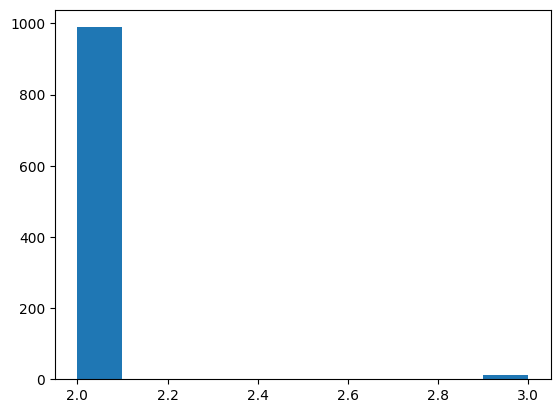

In [88]:
import matplotlib.pyplot as plt
def karger_trials(graph,c=None,n_trials=None):
    if not n_trials:
        n_trials = int(graph.V**c*np.log(graph.V))
    min_cut = np.inf
    min_set = None
    for _ in range(n_trials):
        cut,cut_set = karger(graph)
        if cut<min_cut:
            min_cut = cut
            min_set = cut_set

    return min_cut,min_set
plt.hist([karger_trials(g,c=1,n_trials=None)[0] for i in range(1000)])

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5]),
 <BarContainer object of 10 artists>)

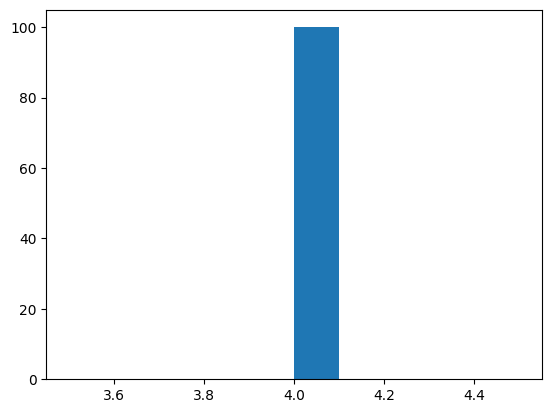

In [91]:
random_graph = create_random_graph(20,p=0.5)  
karger_trials(random_graph,c=1)
plt.hist([karger_trials(random_graph,c=1,n_trials=None)[0] for i in range(100)])

In [92]:
g = Graph(8)
g.add_edge([0,1])
g.add_edge([0,2])
g.add_edge([0,3])
g.add_edge([1,2])
g.add_edge([2,3])
g.add_edge([4,5])
g.add_edge([4,6])
g.add_edge([4,7])
g.add_edge([5,6])
g.add_edge([6,7])
g.add_edge([3,4])
karger_trials(g,2)

(1, [[0, 1, 2, 3], [4, 7, 5, 6]])

# Maxcut

In [93]:
import itertools

def count_cut(partition,g):
    cut_size = 0
    cut_set = []
    for u,v in g.edges:
        if partition[u] != partition[v] and partition[u]>=0 and partition[v]>=0:
            cut_size += 1
            cut_set.append((u,v))
    return cut_size,cut_set

In [94]:
def exact_max_cut(g):
    max_cut = 0
    max_set = []
    for partition in itertools.product([0, 1], repeat=g.V):
        cut_size,cut_set = count_cut(partition,g)
        if cut_size>max_cut:
            max_cut = cut_size
            max_set = cut_set
            max_partition = partition
    return max_cut,max_set,max_partition

def exact_min_cut(g):
    min_cut = np.inf
    min_set = []
    for partition in itertools.product([0, 1], repeat=g.V):
        cut_size,cut_set = count_cut(partition,g)
        if cut_size<min_cut and sum(partition)>0 and sum(partition)<len(partition):
            min_cut = cut_size
            min_set = cut_set
            min_partition = partition
    return min_cut,min_set,min_partition

exact_max_cut(random_graph)

(61,
 [(0, 3),
  (0, 6),
  (0, 8),
  (0, 9),
  (0, 13),
  (0, 16),
  (1, 3),
  (1, 8),
  (1, 9),
  (1, 13),
  (1, 15),
  (1, 18),
  (2, 7),
  (2, 10),
  (2, 12),
  (2, 14),
  (2, 17),
  (2, 19),
  (3, 17),
  (3, 19),
  (4, 6),
  (4, 9),
  (4, 18),
  (5, 6),
  (5, 13),
  (5, 18),
  (6, 7),
  (6, 10),
  (6, 12),
  (6, 17),
  (7, 8),
  (7, 13),
  (7, 18),
  (8, 10),
  (8, 12),
  (8, 14),
  (8, 17),
  (8, 19),
  (9, 10),
  (9, 11),
  (9, 14),
  (9, 17),
  (9, 19),
  (10, 15),
  (10, 18),
  (11, 13),
  (11, 16),
  (11, 18),
  (12, 15),
  (12, 16),
  (12, 18),
  (13, 14),
  (13, 17),
  (13, 19),
  (14, 16),
  (14, 18),
  (15, 19),
  (16, 17),
  (16, 19),
  (17, 18),
  (18, 19)],
 (0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0))

# Simple Randomized Approximation

In [48]:
def randomized_cut(g):
    partition = np.random.randint(0,2,g.V)
    cut_size,cut_set = count_cut(partition,g)
    return cut_size,cut_set,partition

In [96]:
max([randomized_cut(random_graph)[0] for i in range(10000)])

61

(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.400e+01, 8.000e+00, 4.400e+01, 4.000e+01, 5.900e+01, 1.010e+02,
        2.110e+02, 3.500e+02, 5.830e+02, 1.083e+03, 2.519e+03, 1.914e+03,
        1.620e+03, 9.180e+02, 3.770e+02, 1.170e+02, 2.900e+01, 4.000e+00,
        4.000e+00]),
 array([ 8.  , 10.12, 12.24, 14.36, 16.48, 18.6 , 20.72, 22.84, 24.96,
        27.08, 29.2 , 31.32, 33.44, 35.56, 37.68, 39.8 , 41.92, 44.04,
        46.16, 48.28, 50.4 , 52.52, 54.64, 56.76, 58.88, 61.  ]),
 <BarContainer object of 25 artists>)

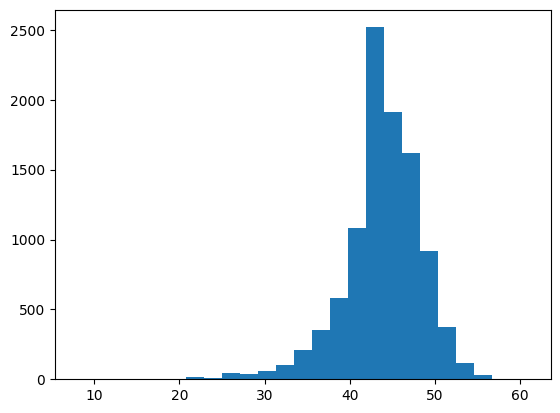

In [95]:
plt.hist([randomized_cut(random_graph)[0] for i in range(10000)],25)

# Conditional Cut

In [61]:
def conditional_cut(g):
    partition = np.ones(g.V)*-1
    E = g.E
    for j in np.random.permutation(g.V):
        w0 = 0
        w1 = 0
        for w in g.adj(j):
            if partition[w] == 0:
                w0 += 1
            if partition[w] == 1:
                w1 += 1
        if w0>=w1:
            partition[j] = 1
        else:
            partition[j] = 0
    cut_size,cut_set = count_cut(partition,g)
    return cut_size,cut_set,partition

In [63]:
cut_sizes = []
for _ in range(10000):   
    cut_sizes.append(conditional_cut(random_graph)[0])

(array([  12.,   55.,  226.,  517.,  983., 2598., 1345.,  996., 1351.,
        1917.]),
 array([49. , 50.2, 51.4, 52.6, 53.8, 55. , 56.2, 57.4, 58.6, 59.8, 61. ]),
 <BarContainer object of 10 artists>)

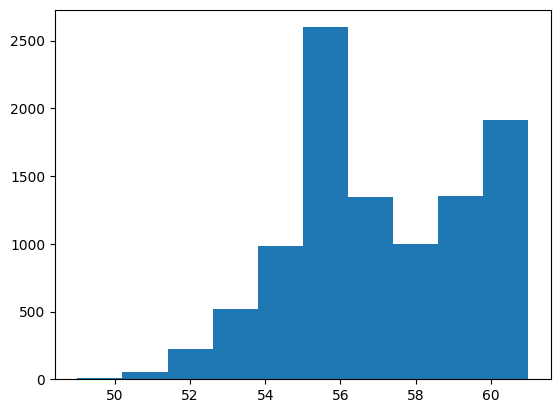

In [64]:
plt.hist(cut_sizes)